In [3]:
import pandas as pd

df = pd.read_csv("tourism.csv")

df.head()



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,869000.0,904000.0,979000.0,1072000.0,1225000.0,1102000.0,1070500.0,1082000.0,NaN,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,481000.0,528000.0,650000.0,595000.0,592000.0,397000.0,261000.0,218000.0,NaN,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2469000.0,3156000.0,2857000.0,3341000.0,3784000.0,4070000.0,4643000.0,5340000.0,NaN,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2242000.0,2238000.0,2328000.0,2363000.0,2663000.0,2819000.0,3003000.0,3042000.0,NaN,NaN


In [4]:
uk = df[df['Country Name'] == 'United Kingdom']
uk


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
79,United Kingdom,GBR,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,29306000.0,29282000.0,31063000.0,32613000.0,34436000.0,35814000.0,37651000.0,36316000.0,NaN,NaN


In [5]:
uk = uk.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 64'], errors='ignore')
uk


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
79,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28295000.0,29306000.0,29282000.0,31063000.0,32613000.0,34436000.0,35814000.0,37651000.0,36316000.0,NaN


In [6]:
uk_long = uk.melt(id_vars=['Country Name'], 
                  var_name='Year', 
                  value_name='Arrivals')

uk_long.head()


,Country Name,Year,Arrivals
0,United Kingdom,1960,NaN
1,United Kingdom,1961,NaN
2,United Kingdom,1962,NaN
3,United Kingdom,1963,NaN
4,United Kingdom,1964,NaN


In [7]:
uk_long['Year'] = pd.to_numeric(uk_long['Year'], errors='coerce')
uk_long = uk_long.dropna(subset=['Year'])
uk_long


,Country Name,Year,Arrivals
0,United Kingdom,1960,NaN
1,United Kingdom,1961,NaN
2,United Kingdom,1962,NaN
3,United Kingdom,1963,NaN
4,United Kingdom,1964,NaN
5,United Kingdom,1965,NaN
6,United Kingdom,1966,NaN
7,United Kingdom,1967,NaN
8,United Kingdom,1968,NaN
9,United Kingdom,1969,NaN


In [8]:
uk_long = uk_long.rename(columns={'Year': 'ds', 'Arrivals': 'y'})



In [9]:
uk_long['ds'] = pd.to_datetime(uk_long['ds'], format='%Y')
uk_long


,Country Name,ds,y
0,United Kingdom,1960-01-01,NaN
1,United Kingdom,1961-01-01,NaN
2,United Kingdom,1962-01-01,NaN
3,United Kingdom,1963-01-01,NaN
4,United Kingdom,1964-01-01,NaN
5,United Kingdom,1965-01-01,NaN
6,United Kingdom,1966-01-01,NaN
7,United Kingdom,1967-01-01,NaN
8,United Kingdom,1968-01-01,NaN
9,United Kingdom,1969-01-01,NaN


In [11]:
uk_long = uk_long.dropna(subset=['y'])


In [12]:
uk_long.head()


,Country Name,ds,y
35,United Kingdom,1995-01-01,21719000.0
36,United Kingdom,1996-01-01,22936000.0
37,United Kingdom,1997-01-01,23215000.0
38,United Kingdom,1998-01-01,23710000.0
39,United Kingdom,1999-01-01,23341000.0


In [13]:
from prophet import Prophet


c:\Users\WELCOME\Desktop\AI_Forecasting_Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [14]:
model = Prophet()
model.fit(uk_long)


11:46:21 - cmdstanpy - INFO - Chain [1] start processing
11:46:21 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=10, freq='Y')
future.tail()


c:\Users\WELCOME\Desktop\AI_Forecasting_Project\venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
29,2023-12-31
30,2024-12-31
31,2025-12-31
32,2026-12-31
33,2027-12-31


In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
29,2023-12-31,3.997877e+07,3.777233e+07,4.234886e+07
30,2024-12-31,4.049100e+07,3.804787e+07,4.266283e+07
31,2025-12-31,4.121602e+07,3.877352e+07,4.358044e+07
32,2026-12-31,4.192775e+07,3.955558e+07,4.421661e+07
33,2027-12-31,4.262613e+07,4.016649e+07,4.501774e+07


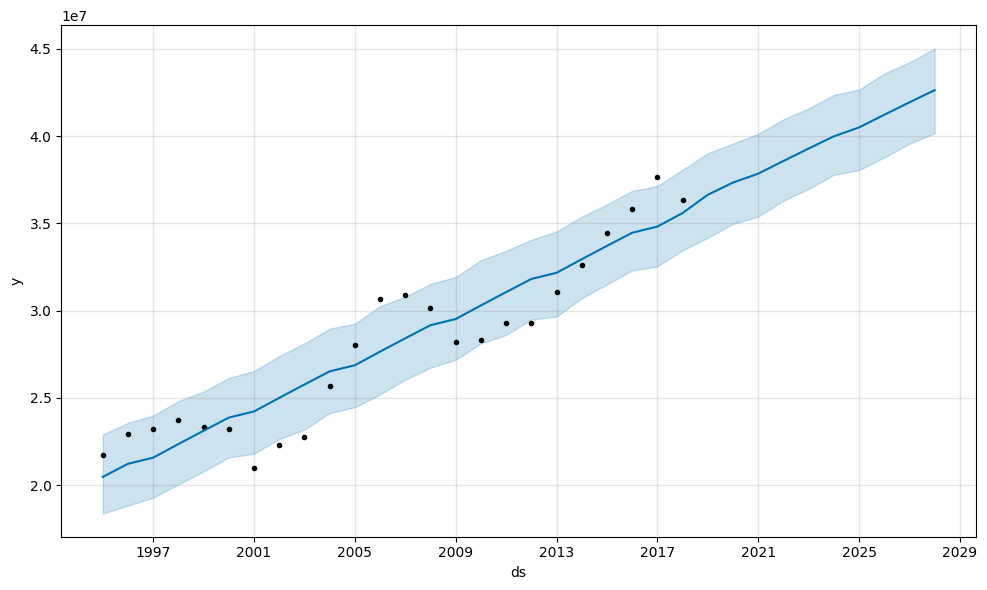

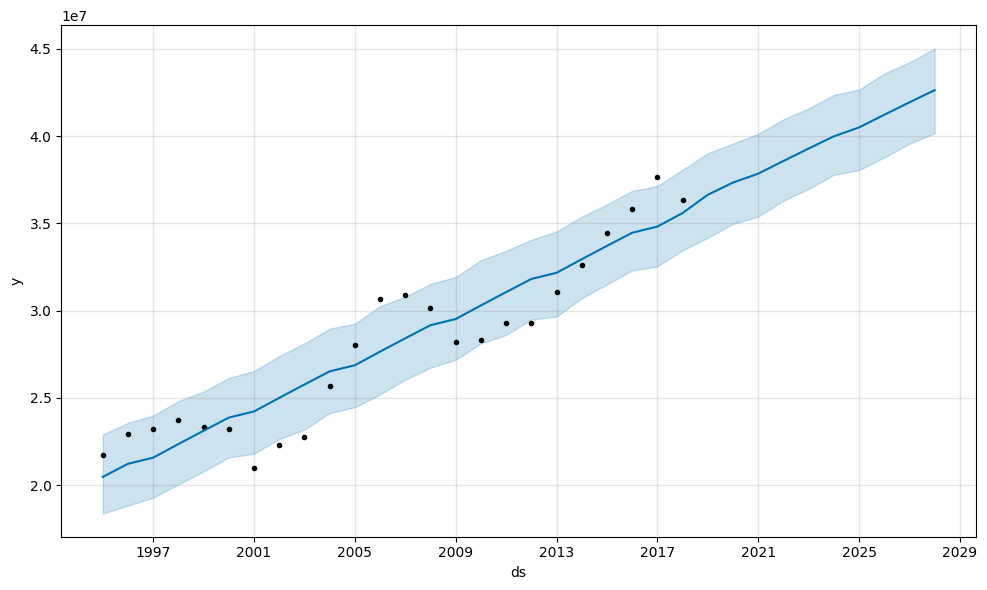

In [17]:
model.plot(forecast)


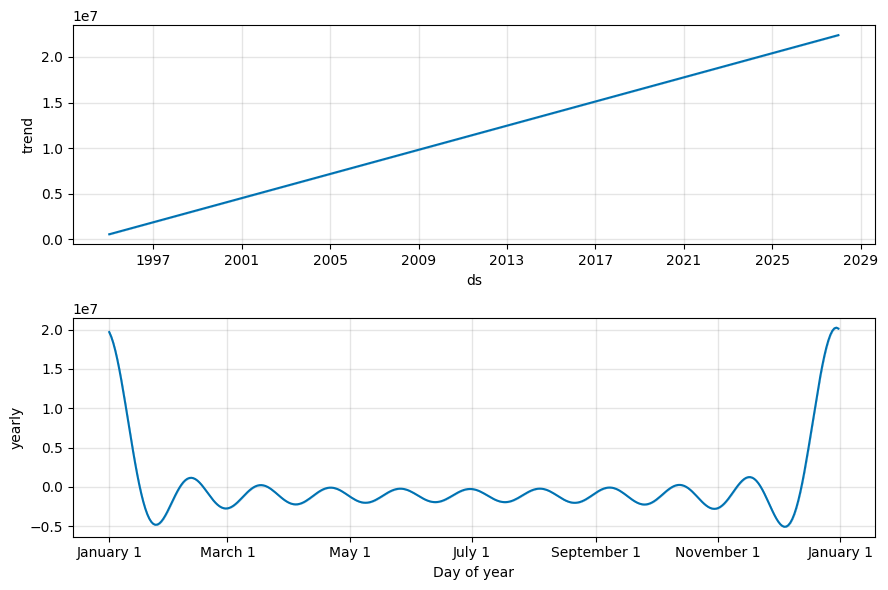

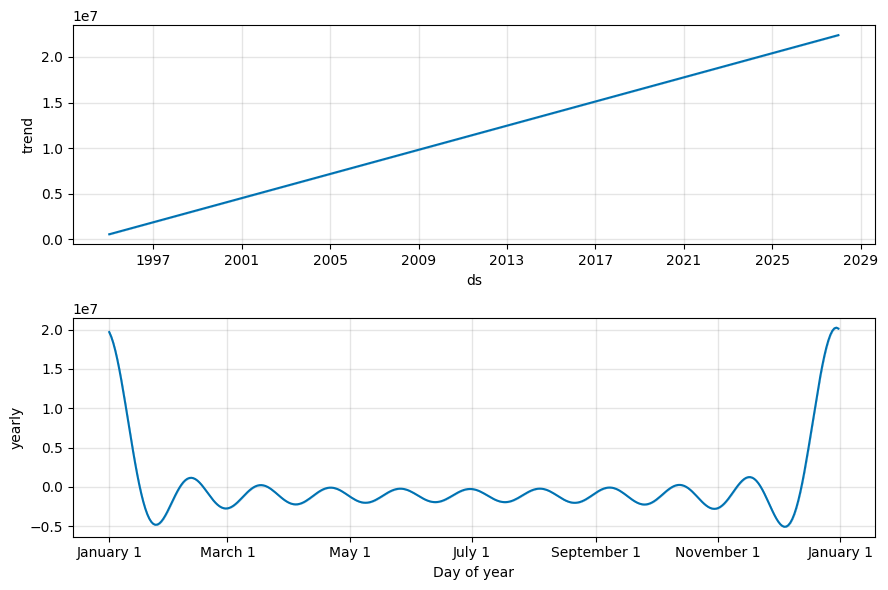

In [18]:
model.plot_components(forecast)


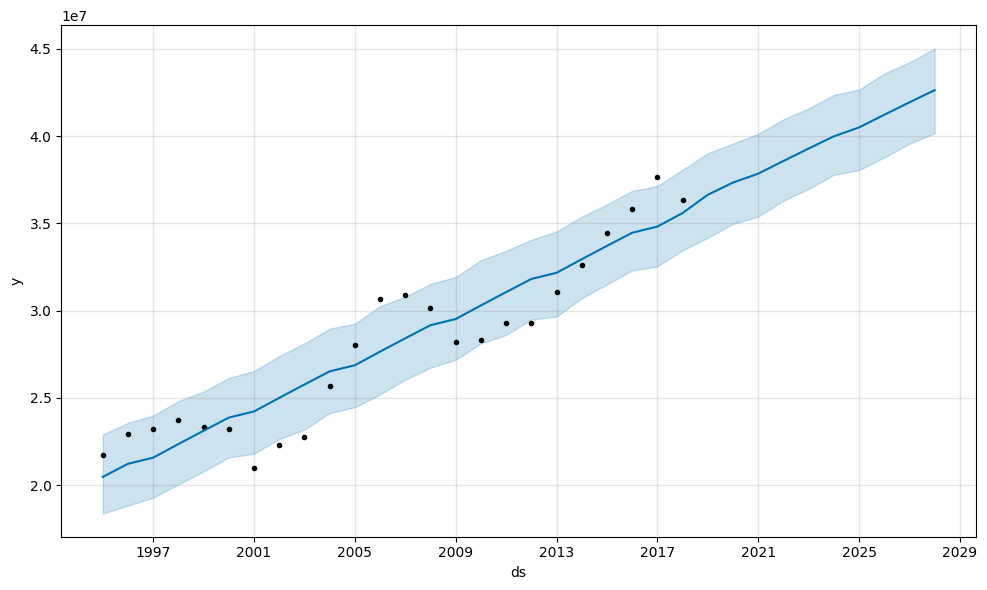

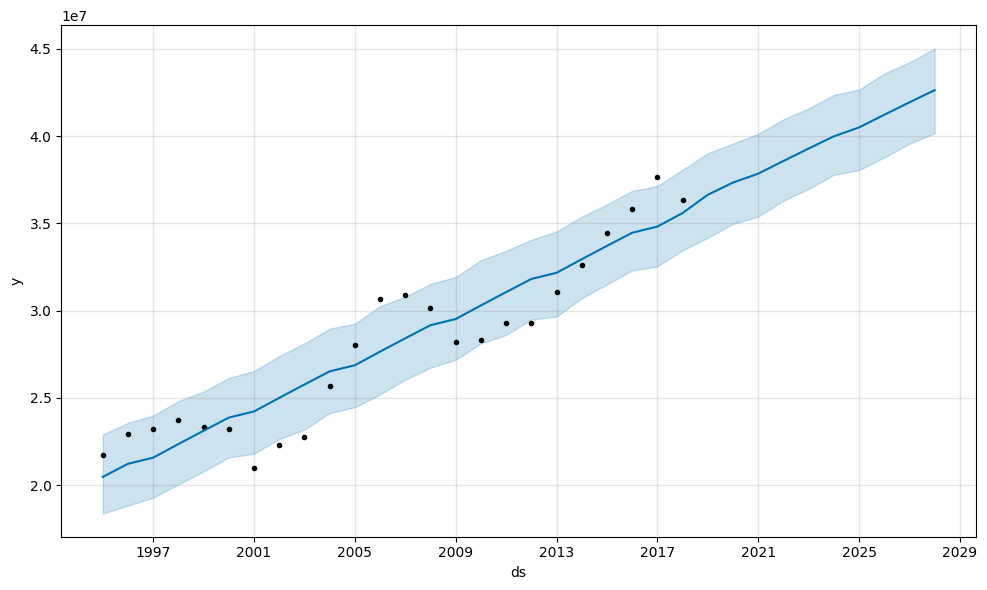

In [19]:
model.plot(forecast)


In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
24,2018-12-31,3.663302e+07,3.416341e+07,3.901054e+07
25,2019-12-31,3.733140e+07,3.496751e+07,3.956300e+07
26,2020-12-31,3.784364e+07,3.538568e+07,4.013073e+07
27,2021-12-31,3.856866e+07,3.629437e+07,4.095071e+07
28,2022-12-31,3.928039e+07,3.697378e+07,4.158467e+07
29,2023-12-31,3.997877e+07,3.777233e+07,4.234886e+07
30,2024-12-31,4.049100e+07,3.804787e+07,4.266283e+07
31,2025-12-31,4.121602e+07,3.877352e+07,4.358044e+07
32,2026-12-31,4.192775e+07,3.955558e+07,4.421661e+07
33,2027-12-31,4.262613e+07,4.016649e+07,4.501774e+07


In [21]:
forecast.to_csv("uk_tourism_forecast.csv", index=False)


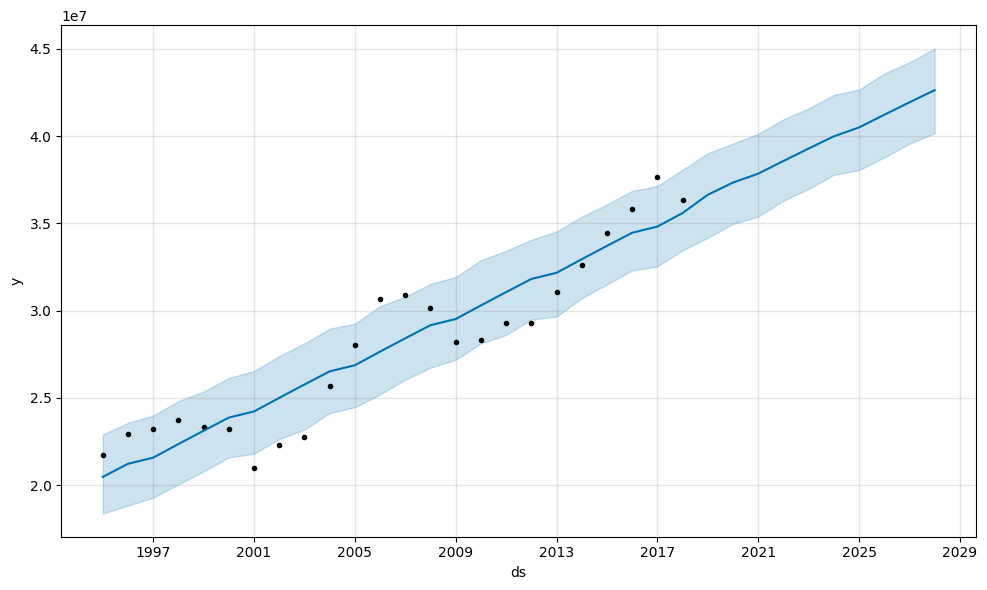

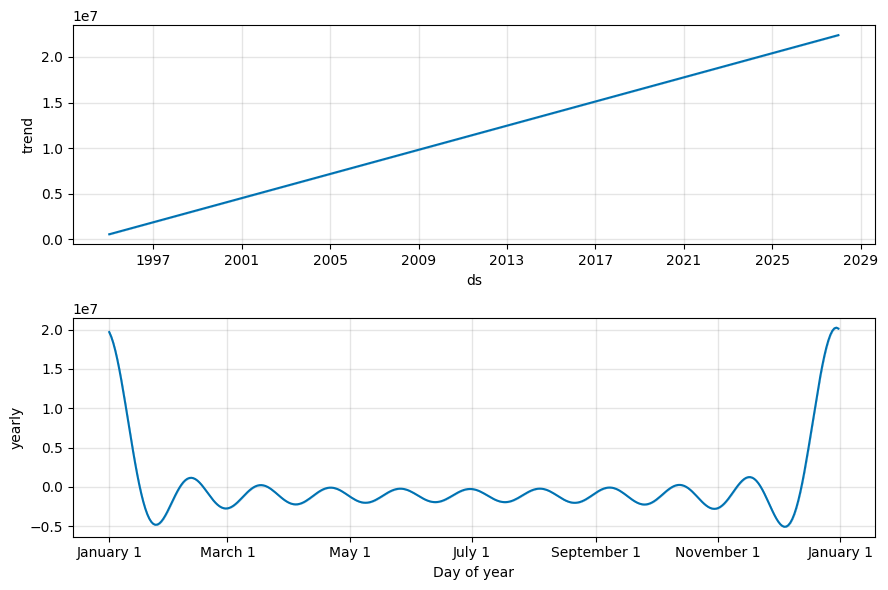

In [22]:
import matplotlib.pyplot as plt

fig1 = model.plot(forecast)
fig1.savefig("forecast_plot.png", dpi=300)

fig2 = model.plot_components(forecast)
fig2.savefig("forecast_components.png", dpi=300)
